In [146]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mtick
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.dummy import DummyRegressor
import requests
import json
from sklearn.model_selection import GridSearchCV

# Scrape data from API request 

In [2]:
#2023 season api scrape

url = "https://www.fangraphs.com/api/tools/free-agent-tracker/v2/free-agents?season=2023&loaddate=2/1/2023%202:32:41%20AM"

payload={}
headers = {
  'authority': 'www.fangraphs.com',
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.9',
  'cookie': 'ezosuibasgeneris-1=8e6be8ee-6d22-4717-5d49-52b566e042c0; _pbjs_userid_consent_data=3524755945110770; _sharedid=2aced33c-b239-4c57-99a3-71d12ed311a2; _omappvp=ztBmTa1sXZNUB14pwjA7td2F63sX9ICAgR1zNq7TuB5JC5PeefaXMnDtog2JlmCDAhKOQtlZTsLQCPwrEWmDJSFpeFbkoIl9; _jsuid=2703602476; _referrer_og=https%3A%2F%2Fwww.google.com%2F; __qca=P0-919022595-1674229044014; cnx_userId=41a26f5f4d35438894b7ff257a5c685a; _pubcid=c81ecbd4-c186-44f8-aec7-f231a726d07e; _cc_id=dfcc95e03fc5cc711fae63c9a010fed2; panoramaId=efd331f720b8842f656725fee8134945a70269a4bd4ba3aa019e6588f5fc1760; ezux_ifep_126045=true; _cb=Cgm4IeCdG2Ir1ED5M; logglytrackingsession=9cc5a46d-31e5-414a-9820-59d1993c9a40; _lr_env_src_ats=false; pbjs-unifiedid=%7B%22TDID%22%3A%22371a9942-c48c-4094-b395-3af86c32ab42%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222022-12-23T22%3A15%3A05%22%7D; TAPAD=%7B%22id%22%3A%22acecf58c-bac3-4b30-8f18-fb68038ea795%22%7D; __gads=ID=3459419be138cd02-22234ccca8da008c:T=1674229045:S=ALNI_MbCmB__rDIBpVea7Odk0aw6YBFsqA; ezouspvh=950; panoramaId_expiry=1675543659001; _gid=GA1.2.1965997503.1675201120; __gpi=UID=0000092dac8865d6:T=1674229045:RT=1675201120:S=ALNI_MY6-F_grCBHLCU1KYtUUU-e3_yPYw; ezoadgid_126045=-1; ezoref_126045=; ezoab_126045=mod79; ezovid_126045=1109357689; lp_126045=https://www.fangraphs.com/projections?pos=&stats=bat; ezovuuid_126045=7f632c7b-fc77-4699-7053-7a626081847e; _chartbeat2=.1674356150869.1675217036312.10100100001.BnfNs0B1YI6N_u6zyBy90qjC2ZXFt.1; _cb_svref=null; ezepvv=420; _ga=GA1.1.1917317860.1674229045; ezux_lpl_126045=1675218143089|272dcdc3-1b75-4c4e-7179-c8f336211a99|false; cto_bidid=mqRVM183YjI3Q25wQ0NHZkdKd2dTV1pvVXZCY0llUTdzTXRabmJoZHY2dkwlMkI0TjF5QUxuNXlzcmpxNWRicFFqT1ZsMFRhS0VNNWQlMkYlMkZ0dDVaOHl0WTVwS2tWZkFJWEd6bzNhbldTM0Y1TUVMM1RVMCUzRA; pmtimesig=[[1675218317004,0]]; cto_bundle=vgySTV9aJTJCRXBWdU9VVjhsYSUyQnZuS1g4VmttUzQ0c0cybTZ3M1B5S05qTTc0N2wxeG55WHZsZURrUXRSNGdqZWJhblM0TXJyVGZrUzRaYnVjRjVCNkoxdXZndUhWWlN4aEg0bTBKY3ZCRFJUanhCM0ElMkJXJTJCeDU4R1lVTFZMb3JrWXFvV3J0JTJGbUsxTkpzVGlxTG9qYVRScmpNaENtdGpPcUtrM1AxWnpCZE5nY3VpUmZTODVNb3hRdENrTWd5JTJCUldCTHpBQVRwUnM5RkdoR05BJTJGVlJNU0F3SHR2a2clM0QlM0Q; ezouspvv=4460; ezouspva=24; ezux_et_126045=2265; ezux_tos_126045=103825; _ga_757YGY2LKP=GS1.1.1675217034.16.1.1675218758.0.0.0; ezovuuidtime_126045=1675218759; active_template::126045=pub_site.1675218759; ezopvc_126045=10',
  'referer': 'https://www.fangraphs.com/roster-resource/free-agent-tracker',
  'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-origin',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

r = requests.request("GET", url, headers=headers, data=payload)

playerdata = r.json()

df = pd.json_normalize(playerdata)

In [3]:
#2022 season api scrape

url = "https://www.fangraphs.com/api/tools/free-agent-tracker/v2/free-agents?season=2022&loaddate=2/1/2023%203:02:46%20AM"

payload={}
headers = {
  'authority': 'www.fangraphs.com',
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.9',
  'cookie': 'ezosuibasgeneris-1=8e6be8ee-6d22-4717-5d49-52b566e042c0; _pbjs_userid_consent_data=3524755945110770; _sharedid=2aced33c-b239-4c57-99a3-71d12ed311a2; _omappvp=ztBmTa1sXZNUB14pwjA7td2F63sX9ICAgR1zNq7TuB5JC5PeefaXMnDtog2JlmCDAhKOQtlZTsLQCPwrEWmDJSFpeFbkoIl9; _jsuid=2703602476; _referrer_og=https%3A%2F%2Fwww.google.com%2F; __qca=P0-919022595-1674229044014; cnx_userId=41a26f5f4d35438894b7ff257a5c685a; _pubcid=c81ecbd4-c186-44f8-aec7-f231a726d07e; _cc_id=dfcc95e03fc5cc711fae63c9a010fed2; panoramaId=efd331f720b8842f656725fee8134945a70269a4bd4ba3aa019e6588f5fc1760; ezux_ifep_126045=true; _cb=Cgm4IeCdG2Ir1ED5M; logglytrackingsession=9cc5a46d-31e5-414a-9820-59d1993c9a40; _lr_env_src_ats=false; pbjs-unifiedid=%7B%22TDID%22%3A%22371a9942-c48c-4094-b395-3af86c32ab42%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222022-12-23T22%3A15%3A05%22%7D; TAPAD=%7B%22id%22%3A%22acecf58c-bac3-4b30-8f18-fb68038ea795%22%7D; __gads=ID=3459419be138cd02-22234ccca8da008c:T=1674229045:S=ALNI_MbCmB__rDIBpVea7Odk0aw6YBFsqA; ezouspvh=950; panoramaId_expiry=1675543659001; _gid=GA1.2.1965997503.1675201120; __gpi=UID=0000092dac8865d6:T=1674229045:RT=1675201120:S=ALNI_MY6-F_grCBHLCU1KYtUUU-e3_yPYw; ezoadgid_126045=-1; ezoref_126045=; ezoab_126045=mod79; ezovid_126045=1109357689; lp_126045=https://www.fangraphs.com/projections?pos=&stats=bat; ezovuuid_126045=7f632c7b-fc77-4699-7053-7a626081847e; _chartbeat2=.1674356150869.1675217036312.10100100001.BnfNs0B1YI6N_u6zyBy90qjC2ZXFt.1; ezepvv=420; pmtimesig=[[1675218317004,0]]; _lr_retry_request=true; _heatmaps_g2g_100553825=yes; _first_pageview=1; _gat_gtag_UA_230086_1=1; _ga=GA1.2.1917317860.1674229045; ezux_lpl_126045=1675220541193|57483edd-510c-4571-77c5-b3646d1685ff|true; cto_bundle=HSIbn19aJTJCRXBWdU9VVjhsYSUyQnZuS1g4VmttWko1ZEgxS2htTiUyRm5pJTJCMUFGQ3BnJTJCY0IzMVpPekpzODJqNHFmUU1HbDlwR0dUU1U1aEIlMkZWUTBIMURwTVFQZ3hzJTJCZHM4dzUybXVFWFdJTmRxU3hUajU3TUh2aGRUeW5SZWVWWjZ1RjJwYUtwTnZUdFowWUo1TmIlMkI4dE1qa2paR3B3JTNEJTNE; cto_bidid=OKANHl83YjI3Q25wQ0NHZkdKd2dTV1pvVXZCY0llUTdzTXRabmJoZHY2dkwlMkI0TjF5QUxuNXlzcmpxNWRicFFqT1ZsMFRhS0VNNWQlMkYlMkZ0dDVaOHl0WTVwS2tWUmJNSVVWU1clMkJSMWg5bDhGJTJGWFVGOXclM0Q; ezouspvv=990; ezouspva=7; ezux_et_126045=2453; ezux_tos_126045=105466; _ga_757YGY2LKP=GS1.1.1675217034.16.1.1675220564.0.0.0; ezovuuidtime_126045=1675220565; active_template::126045=pub_site.1675220565; ezopvc_126045=25',
  'referer': 'https://www.fangraphs.com/roster-resource/free-agent-tracker?pos=&season=2022',
  'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-origin',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

r2 = requests.request("GET", url, headers=headers, data=payload)

playerdata2 = r2.json()

df2 = pd.json_normalize(playerdata2)

In [4]:
#2021 season api scrape

url = "https://www.fangraphs.com/api/tools/free-agent-tracker/v2/free-agents?season=2021&loaddate=2/1/2023%203:07:01%20AM"

payload={}
headers = {
  'authority': 'www.fangraphs.com',
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.9',
  'cookie': 'ezosuibasgeneris-1=8e6be8ee-6d22-4717-5d49-52b566e042c0; _pbjs_userid_consent_data=3524755945110770; _sharedid=2aced33c-b239-4c57-99a3-71d12ed311a2; _omappvp=ztBmTa1sXZNUB14pwjA7td2F63sX9ICAgR1zNq7TuB5JC5PeefaXMnDtog2JlmCDAhKOQtlZTsLQCPwrEWmDJSFpeFbkoIl9; _jsuid=2703602476; _referrer_og=https%3A%2F%2Fwww.google.com%2F; __qca=P0-919022595-1674229044014; cnx_userId=41a26f5f4d35438894b7ff257a5c685a; _pubcid=c81ecbd4-c186-44f8-aec7-f231a726d07e; _cc_id=dfcc95e03fc5cc711fae63c9a010fed2; panoramaId=efd331f720b8842f656725fee8134945a70269a4bd4ba3aa019e6588f5fc1760; ezux_ifep_126045=true; _cb=Cgm4IeCdG2Ir1ED5M; logglytrackingsession=9cc5a46d-31e5-414a-9820-59d1993c9a40; _lr_env_src_ats=false; pbjs-unifiedid=%7B%22TDID%22%3A%22371a9942-c48c-4094-b395-3af86c32ab42%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222022-12-23T22%3A15%3A05%22%7D; TAPAD=%7B%22id%22%3A%22acecf58c-bac3-4b30-8f18-fb68038ea795%22%7D; __gads=ID=3459419be138cd02-22234ccca8da008c:T=1674229045:S=ALNI_MbCmB__rDIBpVea7Odk0aw6YBFsqA; ezouspvh=950; panoramaId_expiry=1675543659001; _gid=GA1.2.1965997503.1675201120; __gpi=UID=0000092dac8865d6:T=1674229045:RT=1675201120:S=ALNI_MY6-F_grCBHLCU1KYtUUU-e3_yPYw; ezoadgid_126045=-1; ezoref_126045=; ezoab_126045=mod79; ezovid_126045=1109357689; lp_126045=https://www.fangraphs.com/projections?pos=&stats=bat; ezovuuid_126045=7f632c7b-fc77-4699-7053-7a626081847e; _chartbeat2=.1674356150869.1675217036312.10100100001.BnfNs0B1YI6N_u6zyBy90qjC2ZXFt.1; ezepvv=420; pmtimesig=[[1675218317004,0]]; _lr_retry_request=true; _heatmaps_g2g_100553825=yes; _ga=GA1.2.1917317860.1674229045; ezux_lpl_126045=1675220569135|69f957f5-a79f-45b7-5acc-eb285b14ef19|true; cto_bundle=t3DLWF9aJTJCRXBWdU9VVjhsYSUyQnZuS1g4VmttWVdDelU1QlMweTRpQ25yV2hvVDZVWlpacklYWG5Sc0tqVWhFcnJmT3pBalg4UlpvVEhSbFQyRmtNMjhlTHY0RDB5MyUyQm9LZ3pzVVp0TTAzb3ROR1U3VyUyQnQlMkZPRHhCRFg3UXFaY1hXUjh2Tm5LbDdjS3NXJTJGQmNORWhTZTJ4U05zTWclM0QlM0Q; cto_bidid=HDTxKF83YjI3Q25wQ0NHZkdKd2dTV1pvVXZCY0llUTdzTXRabmJoZHY2dkwlMkI0TjF5QUxuNXlzcmpxNWRicFFqT1ZsMFRhS0VNNWQlMkYlMkZ0dDVaOHl0WTVwS2tWUTluNkZPciUyQjVNZmRDVGNzM3N5T25rJTNE; ez_anchor_closed=true; ezouspvv=1500; ezouspva=26; ezux_et_126045=2499; ezux_tos_126045=105704; _ga_757YGY2LKP=GS1.1.1675217034.16.1.1675220819.0.0.0; ezovuuidtime_126045=1675220820; active_template::126045=pub_site.1675220820; ezopvc_126045=27',
  'referer': 'https://www.fangraphs.com/roster-resource/free-agent-tracker?pos=&season=2021',
  'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-origin',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

r3 = requests.request("GET", url, headers=headers, data=payload)

playerdata3 = r3.json()

df3 = pd.json_normalize(playerdata3)

In [5]:
#2020 season api scrape

url = "https://www.fangraphs.com/api/tools/free-agent-tracker/free-agents?season=2020&loaddate=1674741537"

payload={}
headers = {}

r4 = requests.request("GET", url, headers=headers, data=payload)

playerdata4 = r4.json()

df4 = pd.json_normalize(playerdata4)

# Data Cleaning

In [6]:
len(df4), len(df3), len(df2), len(df)

(279, 333, 265, 273)

In [7]:
#total rows of four data frames
len(df4) + len(df3) + len(df2) + len(df)

1150

In [8]:
#combined all four data frames into one
free_agent = pd.concat([df,df2,df3,df4], axis=0)

In [9]:
free_agent.columns

Index(['ContractId', 'ContractType', 'ContractTypeId', 'playerId', 'position',
       'war_prev', 'war_proj', 'playerName', 'Bats', 'Throws', 'age',
       'team_prev', 'teamoverride', 'qo', 'qo_accepted', 'med_years',
       'med_aav', 'servicetime', 'team_new', 'fullvalue', 'contract_years',
       'ContractTotal', 'YearsTotal', 'SigningTeamId', 'aav',
       'contract_total'],
      dtype='object')

In [10]:
#dropped all the columns that are not needed
free_agent = free_agent[['playerName','age','war_prev','position','aav']]

In [11]:
#renamed all columns
free_agent.rename(columns={'playerName':'Name','age':'Age','war_prev':'WAR','position':'Pos','aav':'YR_Salary'},inplace=True)

In [12]:
free_agent.isna().any(axis=1).sum()

588

In [13]:
#dropped all na values in the dataframe
free_agent = free_agent.dropna(subset=['Name', 'Age','WAR','Pos','YR_Salary'])

In [14]:
free_agent.head()

Name  Age       WAR    Pos        YR_Salary
0       Aaron Judge   31  11.42350  RF/CF       40000000.0
1    Dansby Swanson   29   6.35239     SS  25285714.285714
2       Trea Turner   30   6.34497  SS/2B  27272727.272727
3      Carlos Rodón   30   6.20158     SP       27000000.0
4  Justin Verlander   40   6.09025     SP       43333333.0

In [46]:
#dropped all empty values in YR_Salary columns
free_agent['YR_Salary'].replace('', np.nan, inplace=True)
free_agent.dropna(subset=['YR_Salary'], inplace=True)

In [47]:
len(free_agent)

538

In [63]:
#Make a column with position columns
def filter(x):
    if (x == 'LF' or x == 'CF' or x == 'RF'or x == 'RF/CF' or x == 'CF/RF/LF' or x == 'CF/LF/RF' or x == 'LF/RF'or x =='LF/CF' or x == 'RF/LF' or x == 'LF/RF/CF' or x == 'RF/LF/CF' or x == 'LF/CF/RF'):
        return 'OF'
    elif x == 'C':
        return 'C'
    elif (x == 'SP' or x == 'RP' or x == 'SP/RP' or x == 'RP/SP'):
        return 'P'
    elif x == 'DH':
        return 'DH'
    elif (x == 'SS' or x == '2B' or x == '3B' or x == '1B' or x == 'SS/2B' or x == 'SS/3B' or x == '3B/1B/2B' or x == '3B/DH' or x =='2B/3B' or x == '2B/1B/3B' or x =='2B/SS' or x == '2B/3B/SS' or x == '3B/1B' or x == '3B/2B/SS'):
        return 'INF'
    else:
        return 'MULTI'

free_agent['Pos_cat'] = free_agent['Pos'].apply(filter)

In [65]:
eda_data= free_agent[['Age','WAR','Pos_cat','YR_Salary']]
free_agent= free_agent[['Age','WAR','Pos_cat','YR_Salary']]

In [66]:
#cleaned data with dummy variables
free_agent = pd.get_dummies(free_agent, columns = ['Pos_cat'], prefix ='', prefix_sep='', drop_first = True)

In [68]:
#prediction data set loaded and cleaned
fa_pred_data = pd.read_csv('Prediction.csv')
fa_pred_data = fa_pred_data[['Age', 'WAR', 'Pos_cat']]
fa_pred_data = pd.get_dummies(fa_pred_data, columns = ['Pos_cat'], prefix ='', prefix_sep='', drop_first = True)

In [69]:
#prediction data set loaded and cleaned
old_fa = pd.read_csv('Prediction2.csv')
old_fa = old_fa[['Age', 'WAR', 'Pos_cat']]
old_fa = pd.get_dummies(old_fa, columns = ['Pos_cat'], prefix ='', prefix_sep='', drop_first = True)

# EDA

/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/1040466016.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/1040466016.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -10000000.0, '-10,000,000'),
 Text(0, 0.0, '0'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 30000000.0, '30,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 50000000.0, '50,000,000')]

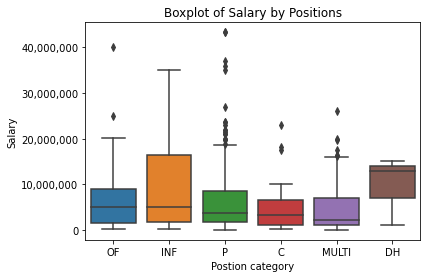

In [79]:
#boxplot with position and salary

box = sns.boxplot(x = eda_data['Pos_cat'],
            y = eda_data['YR_Salary'].astype(float))
plt.title('Boxplot of Salary by Positions')
plt.xlabel('Postion category')
plt.ylabel('Salary')

#change value for y axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [99]:
#stats by position categories
eda_data['Pos_cat']=eda_data['Pos_cat'].astype('category')
eda_data['YR_Salary']=eda_data['YR_Salary'].astype(float)
medians = eda_data.groupby(['Pos_cat'])['YR_Salary'].median().values
qunt = eda_data.groupby(['Pos_cat'])['YR_Salary'].quantile([0.25,0.75])
max = eda_data.groupby(['Pos_cat'])['YR_Salary'].max()
min = eda_data.groupby(['Pos_cat'])['YR_Salary'].min()
print(medians,qunt,max,min)

[ 3250000. 13000000.  5000000.  2175000.  5000000.  3750000.] Pos_cat      
C        0.25     1114865.0
         0.75     6500000.0
DH       0.25     7000000.0
         0.75    14000000.0
INF      0.25     1700000.0
         0.75    16333333.5
MULTI    0.25     1000000.0
         0.75     7000000.0
OF       0.25     1500000.0
         0.75     9000000.0
P        0.25     1750000.0
         0.75     8500000.0
Name: YR_Salary, dtype: float64 Pos_cat
C        2.310000e+07
DH       1.500000e+07
INF      3.510000e+07
MULTI    2.600000e+07
OF       4.000000e+07
P        4.333333e+07
Name: YR_Salary, dtype: float64 Pos_cat
C         180965.0
DH       1000000.0
INF       141892.0
MULTI      88949.0
OF        218949.0
P              0.0
Name: YR_Salary, dtype: float64


In [100]:
#made an age category for boxplot
eda_data['Age'] = (eda_data['Age']).astype('int32')
def filter(x):
    if x <30:
        return '20s'
    elif x > 20 and x < 36:
        return 'Early 30s'
    elif x >= 36 and x < 40:
        return 'Late 30s'
    else:
        return '40s'

eda_data['Age_cat'] = eda_data['Age'].apply(filter)

/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/4255672089.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/4255672089.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -10000000.0, '-10,000,000'),
 Text(0, 0.0, '0'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 30000000.0, '30,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 50000000.0, '50,000,000')]

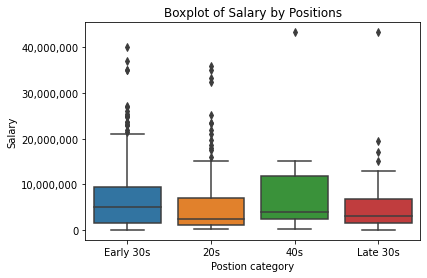

In [101]:
#boxplot with age and salary
box = sns.boxplot(x = eda_data['Age_cat'],
            y = eda_data['YR_Salary'])
plt.title('Boxplot of Salary by Positions')
plt.xlabel('Postion category')
plt.ylabel('Salary')

#change value for y axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [102]:
#stats by age categories
medians = eda_data.groupby(['Age_cat'])['YR_Salary'].median().values
qunt = eda_data.groupby(['Age_cat'])['YR_Salary'].quantile([0.25,0.75])
max = eda_data.groupby(['Age_cat'])['YR_Salary'].max()
min = eda_data.groupby(['Age_cat'])['YR_Salary'].min()
print(medians, qunt, max, min)

[2500000. 4000000. 5000000. 3142857.] Age_cat        
20s        0.25     1100000.00
           0.75     7000000.00
40s        0.25     2500000.00
           0.75    11750000.00
Early 30s  0.25     1500000.00
           0.75     9324999.75
Late 30s   0.25     1500000.00
           0.75     6750000.00
Name: YR_Salary, dtype: float64 Age_cat
20s          3.600000e+07
40s          4.333333e+07
Early 30s    4.000000e+07
Late 30s     4.333333e+07
Name: YR_Salary, dtype: float64 Age_cat
20s          162162.0
40s           93407.0
Early 30s         0.0
Late 30s          0.0
Name: YR_Salary, dtype: float64


In [103]:
#374 1 year contract out of 535 free agent contracts signed

/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3350895182.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3350895182.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


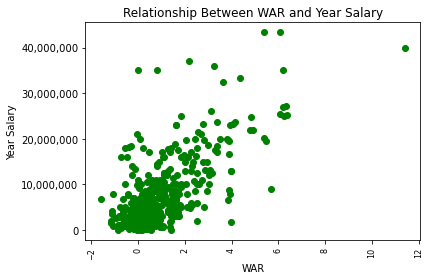

In [105]:
#plot
eda_data['WAR'] = eda_data['WAR'].astype(float)
x = eda_data['WAR']
y = eda_data['YR_Salary']
plt.scatter(x, y,c='green')
plt.xticks(rotation='vertical',size=8,c='black')
plt.gca().invert_xaxis()
#convert y axis value
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
#labels
plt.title('Relationship Between WAR and Year Salary')
plt.xlabel('WAR')
plt.ylabel('Year Salary')
plt.gca().invert_xaxis()
fig.text(.66,.28, 'Correlation COefficient: 0.71', size=7)
plt.show()

In [106]:
eda_data['WAR'].corr(eda_data['YR_Salary'])

0.7053545609688399

In [107]:
eda_data.describe()

Age         WAR     YR_Salary
count  538.000000  538.000000  5.380000e+02
mean    32.185874    0.822447  6.581690e+06
std      2.937402    1.398638  7.348124e+06
min     26.000000   -1.603130  0.000000e+00
25%     30.000000   -0.032446  1.500000e+06
50%     32.000000    0.407695  4.000000e+06
75%     34.000000    1.216938  8.729167e+06
max     43.000000   11.423500  4.333333e+07

# Modeling

In [108]:
#getting data set ready/training and testing data split
x = free_agent.drop(columns = 'YR_Salary')
y = free_agent['YR_Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [110]:
#linear regression model using ols
x_sm = x = sm.add_constant(x)
model = sm.OLS(y.astype(float),x_sm.astype(float))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              YR_Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     76.97
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.21e-76
Time:                        16:35:43   Log-Likelihood:                -9080.0
No. Observations:                 538   AIC:                         1.818e+04
Df Residuals:                     530   BIC:                         1.821e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.719e+06   2.75e+06      2.806      0.005    2.32e+06    1.31e+07
Age        -1.296e+05   8.07e+04     -1.606      0.109   -2.88e+05    2.89e+04
WAR         3.666e+06   1.64e+05     22.363      0.000    3.34e+06    3.99e+06
DH          3.388e+06   3.19e+06      1.062      0.289   -2.88e+06    9.66e+06
INF         6.637e+05   1.04e+06      0.636      0.525   -1.39e+06    2.71e+06
MULTI      -8.448e+05   1.04e+06     -0.812      0.417   -2.89e+06     1.2e+06
OF          4.383e+05   1.07e+06      0.409      0.683   -1.67e+06    2.55e+06
P          -5.435e+04   8.71e+05     -0.062      0.950   -1.76e+06    1.66e+06
==============================================================================
Omnibus:                      219.952   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.637
Skew:                           1.745   Prob(JB):                    8.42e-251
Kurtosis:                       9.261   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred = lr.predict(x_test)

In [113]:
#linear regression model error summary
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mean_squared_error(y_test, y_pred,squared=False))
print("Linear Regression MAE: ",mae)
print("Linear Regression MSE: ",mse)
print("Linear Regression RMSE: ",rmse)

Linear Regression MAE:  3721025.2445251173
Linear Regression MSE:  25158000849359.05
Linear Regression RMSE:  5015775.199244784


In [114]:
np.mean(cross_val_score(lr,x_train,y_train, scoring = 'neg_mean_absolute_error'))

-3674192.5763272583

In [115]:
#lasso regression model
lm_l = Lasso()
lm_l.fit(x_train,y_train)

Lasso()

In [116]:
y_pred2 = lm_l.predict(x_test)

In [117]:
#lasso regression model error summary
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = (mean_squared_error(y_test, y_pred2,squared=False))
print("Lasso Regression MAE: ",mae)
print("Lasso Regression MSE: ",mse)
print("Lasso Regression RMSE: ",rmse)

Lasso Regression MAE:  3721025.643354469
Lasso Regression MSE:  25157996573623.64
Lasso Regression RMSE:  5015774.773015994


In [118]:
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error'))

-3674192.4946747916

In [119]:
#random forest model
rf = RandomForestRegressor()

In [120]:
#random forest model mae
np.mean(cross_val_score(rf,x_train,y_train, scoring = 'neg_mean_absolute_error'))

-3945179.937126521

In [147]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/li

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/cinonbak/opt/anaconda

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [148]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=90)

In [149]:
gs.best_score_ 

-3700749.790067446

In [121]:
# create a dummy regressor with median
dummy_reg = DummyRegressor(strategy='median')
# fit it on the training set
dummy_reg.fit(x_train, y_train)
# make predictions on the test set
y_pred = dummy_reg.predict(x_test)

# calculate root mean squared error
mae = mean_absolute_error(y_test, y_pred)
print("Baeline MAE:", mae)

Baeline MAE: 4029179.456349206


In [122]:
#linear regression prediction completed with 2024 fa players
y_pred_train = lr.predict(fa_pred_data)
y_pred_train

array([19158743.10195351, 21098874.16020393, 22043849.36801126,
       23039950.51731768, 15213357.31560023, 19356117.821366  ,
       20193442.389684  , 14240239.01532666, 13894795.32833284,
       17788277.97932275, 12610293.55941147, 11863217.69743166,
        8399846.52389205, 13940087.78650098, 11495379.93885233,
       16435921.5756487 , 13087843.84974634, 14112011.82967972,
       14744815.80472489])

In [143]:
#save tested data as csv
fa_pred_data['YR_Salary'] = y_pred_train.round(2)
fa_pred_data['Name'] = Names
fa_pred_data.head()
fa_pred_data.to_csv('Free-agent-2024-prediction.csv',index=False)

In [123]:
#brining in names for the plot graph
df5 = pd.read_csv('Prediction.csv')
Names = df5['Name']

In [124]:
#making path for image
def getImage(path):
   return OffsetImage(plt.imread(path, format="png"), zoom=0.1)
paths = ['Shohei Ohtani .png', 'Shohei Ohtani .png','Rafael Devers .png', 'Manny Machado .png', 'Julio Urias .png', 'Max Scherzer .png', 'Aaron Nola .png', 'Yu Darvish .png', 'Ian Happ .png', 'Matt Chapman .png', 'Marcus Stroman .png', 'Lucas Giolito .png', 'Josh Hader .png', 'Rhys Hoskins .png', 'Josh Bell .png', 'Clayton Kershaw .png', 'Teoscar Hernández .png', 'Yasmani Grandal .png','J.D Martinez .png']

/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3794113593.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3794113593.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


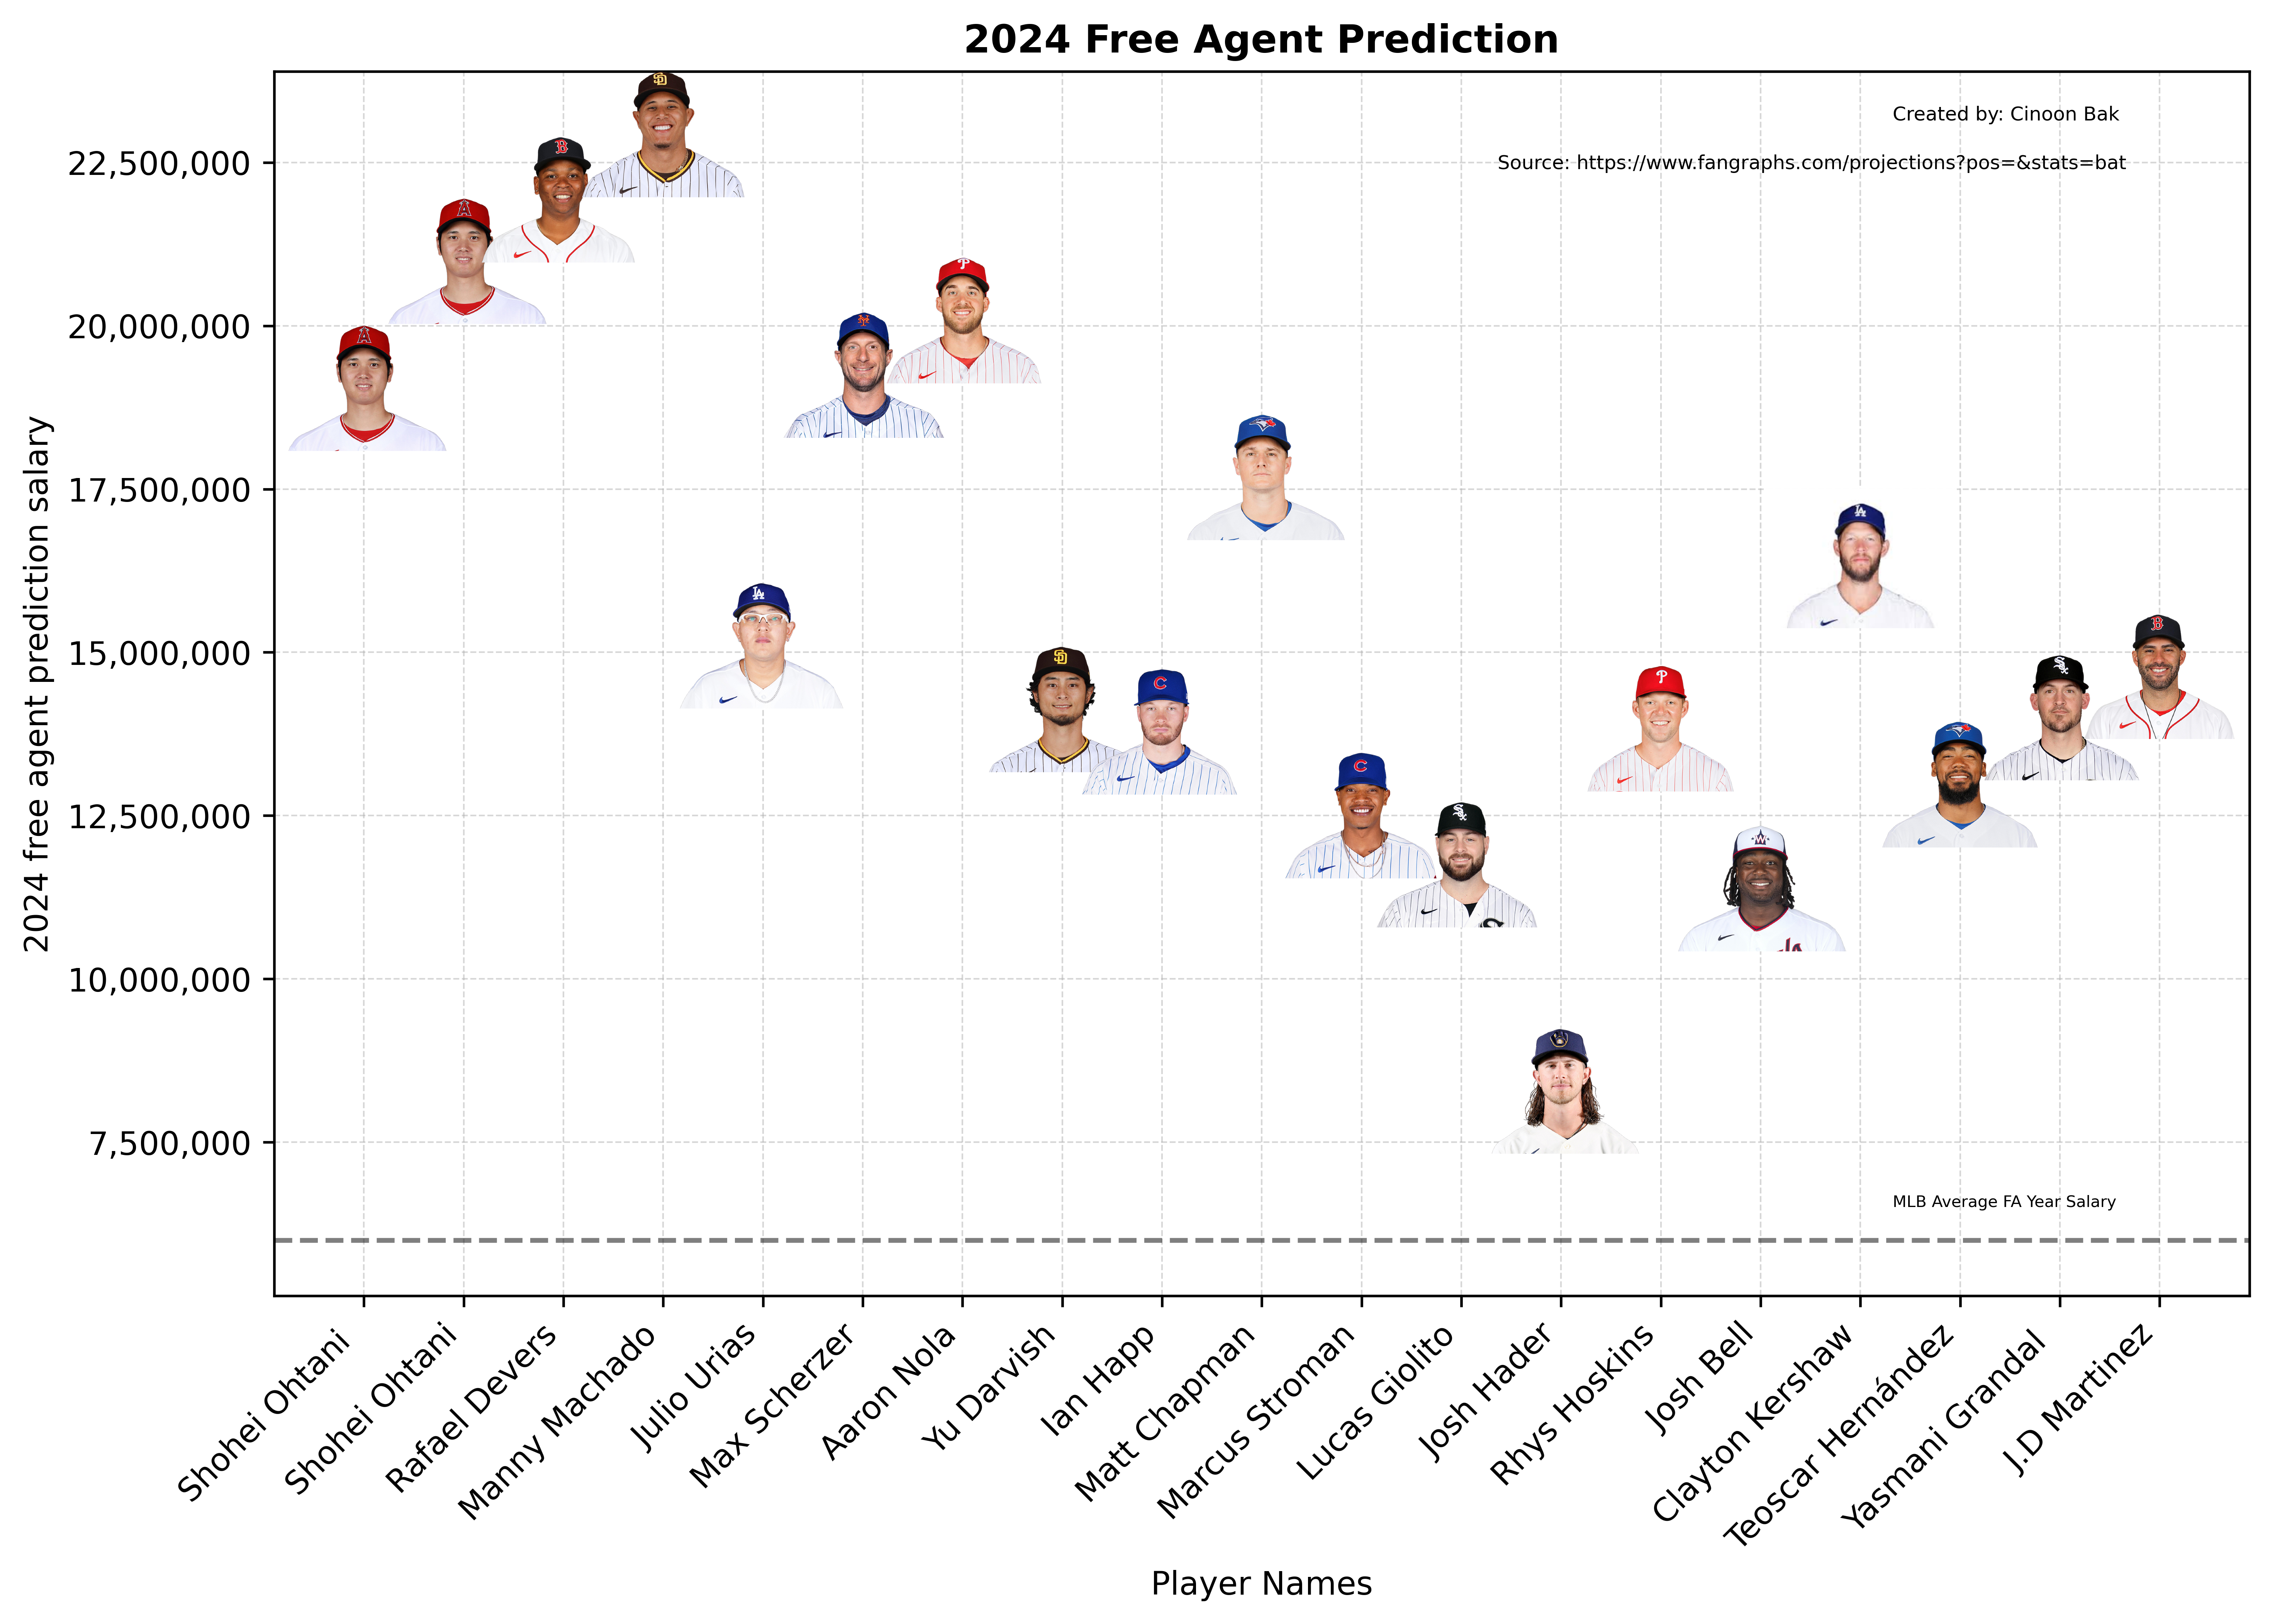

In [125]:
#plot
fig, ax = plt.subplots(figsize=(11,7), dpi=600)
plt.scatter(Names,y_pred_train)
ax.set_title('2024 Free Agent Prediction', size=12, fontweight='bold')
plt.xlabel('Player Names')
plt.xticks(rotation=45,ha='right')
plt.ylabel('2024 free agent prediction salary')
ax.grid(linestyle='--', linewidth=0.5, alpha=0.5)
#average fa salary
plt.axhline(y=6000000, color = 'black', linestyle='dashed', alpha=.5)
fig.text(.76,.18, 'MLB Average FA Year Salary', size=5)
#source and name
fig.text(.605,.82, 'Source: https://www.fangraphs.com/projections?pos=&stats=bat', size=6)
fig.text(.76,.85, 'Created by: Cinoon Bak',size=6)
#change value for y axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
#add images in
for x0, y0, path in zip(Names, y_pred_train, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.show()


In [126]:
#linear regression prediction completed for 1900s players
y_pred_train2 = lr.predict(old_fa)
y_pred_train2

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- P 
Feature names seen at fit time, yet now missing:
- P

  warnings.warn(message, FutureWarning)


array([58156793.45893027,  3940374.20104604, 44665565.60746948,
       25452681.47398755,  9560829.79648361, 42190232.10264009,
       35971022.1802533 , 43095663.87316003, 26607138.53183409,
       32592571.36461945])

In [144]:
#save tested data as csv
old_fa['YR_Salary'] = y_pred_train2.round(2)
old_fa['Name'] = OldNames
old_fa.to_csv('1900s-prediction.csv',index=False)

In [127]:
#brining in names for the plot graph
df6 = pd.read_csv('Prediction2.csv')
OldNames = df6['Name']

In [128]:
#making path for image
def getImage(path):
   return OffsetImage(plt.imread(path, format="jpeg"), zoom=0.035)
paths = ['Babe Ruth .jpeg', 'Babe Ruth .jpeg','Ted Williams .jpeg', 'Mickey Cochrane .jpeg', 'Ron Blomberg .jpeg', 'Lou Gehrigh .jpeg', 'Cy Young .jpeg', 'Jimmie Foxx .jpeg', 'Yogi Berra .jpeg', 'Jackie Robinson .jpeg']

/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3491263025.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/cs/p4cb366d5417jx89mzkyx0bh0000gn/T/ipykernel_27220/3491263025.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


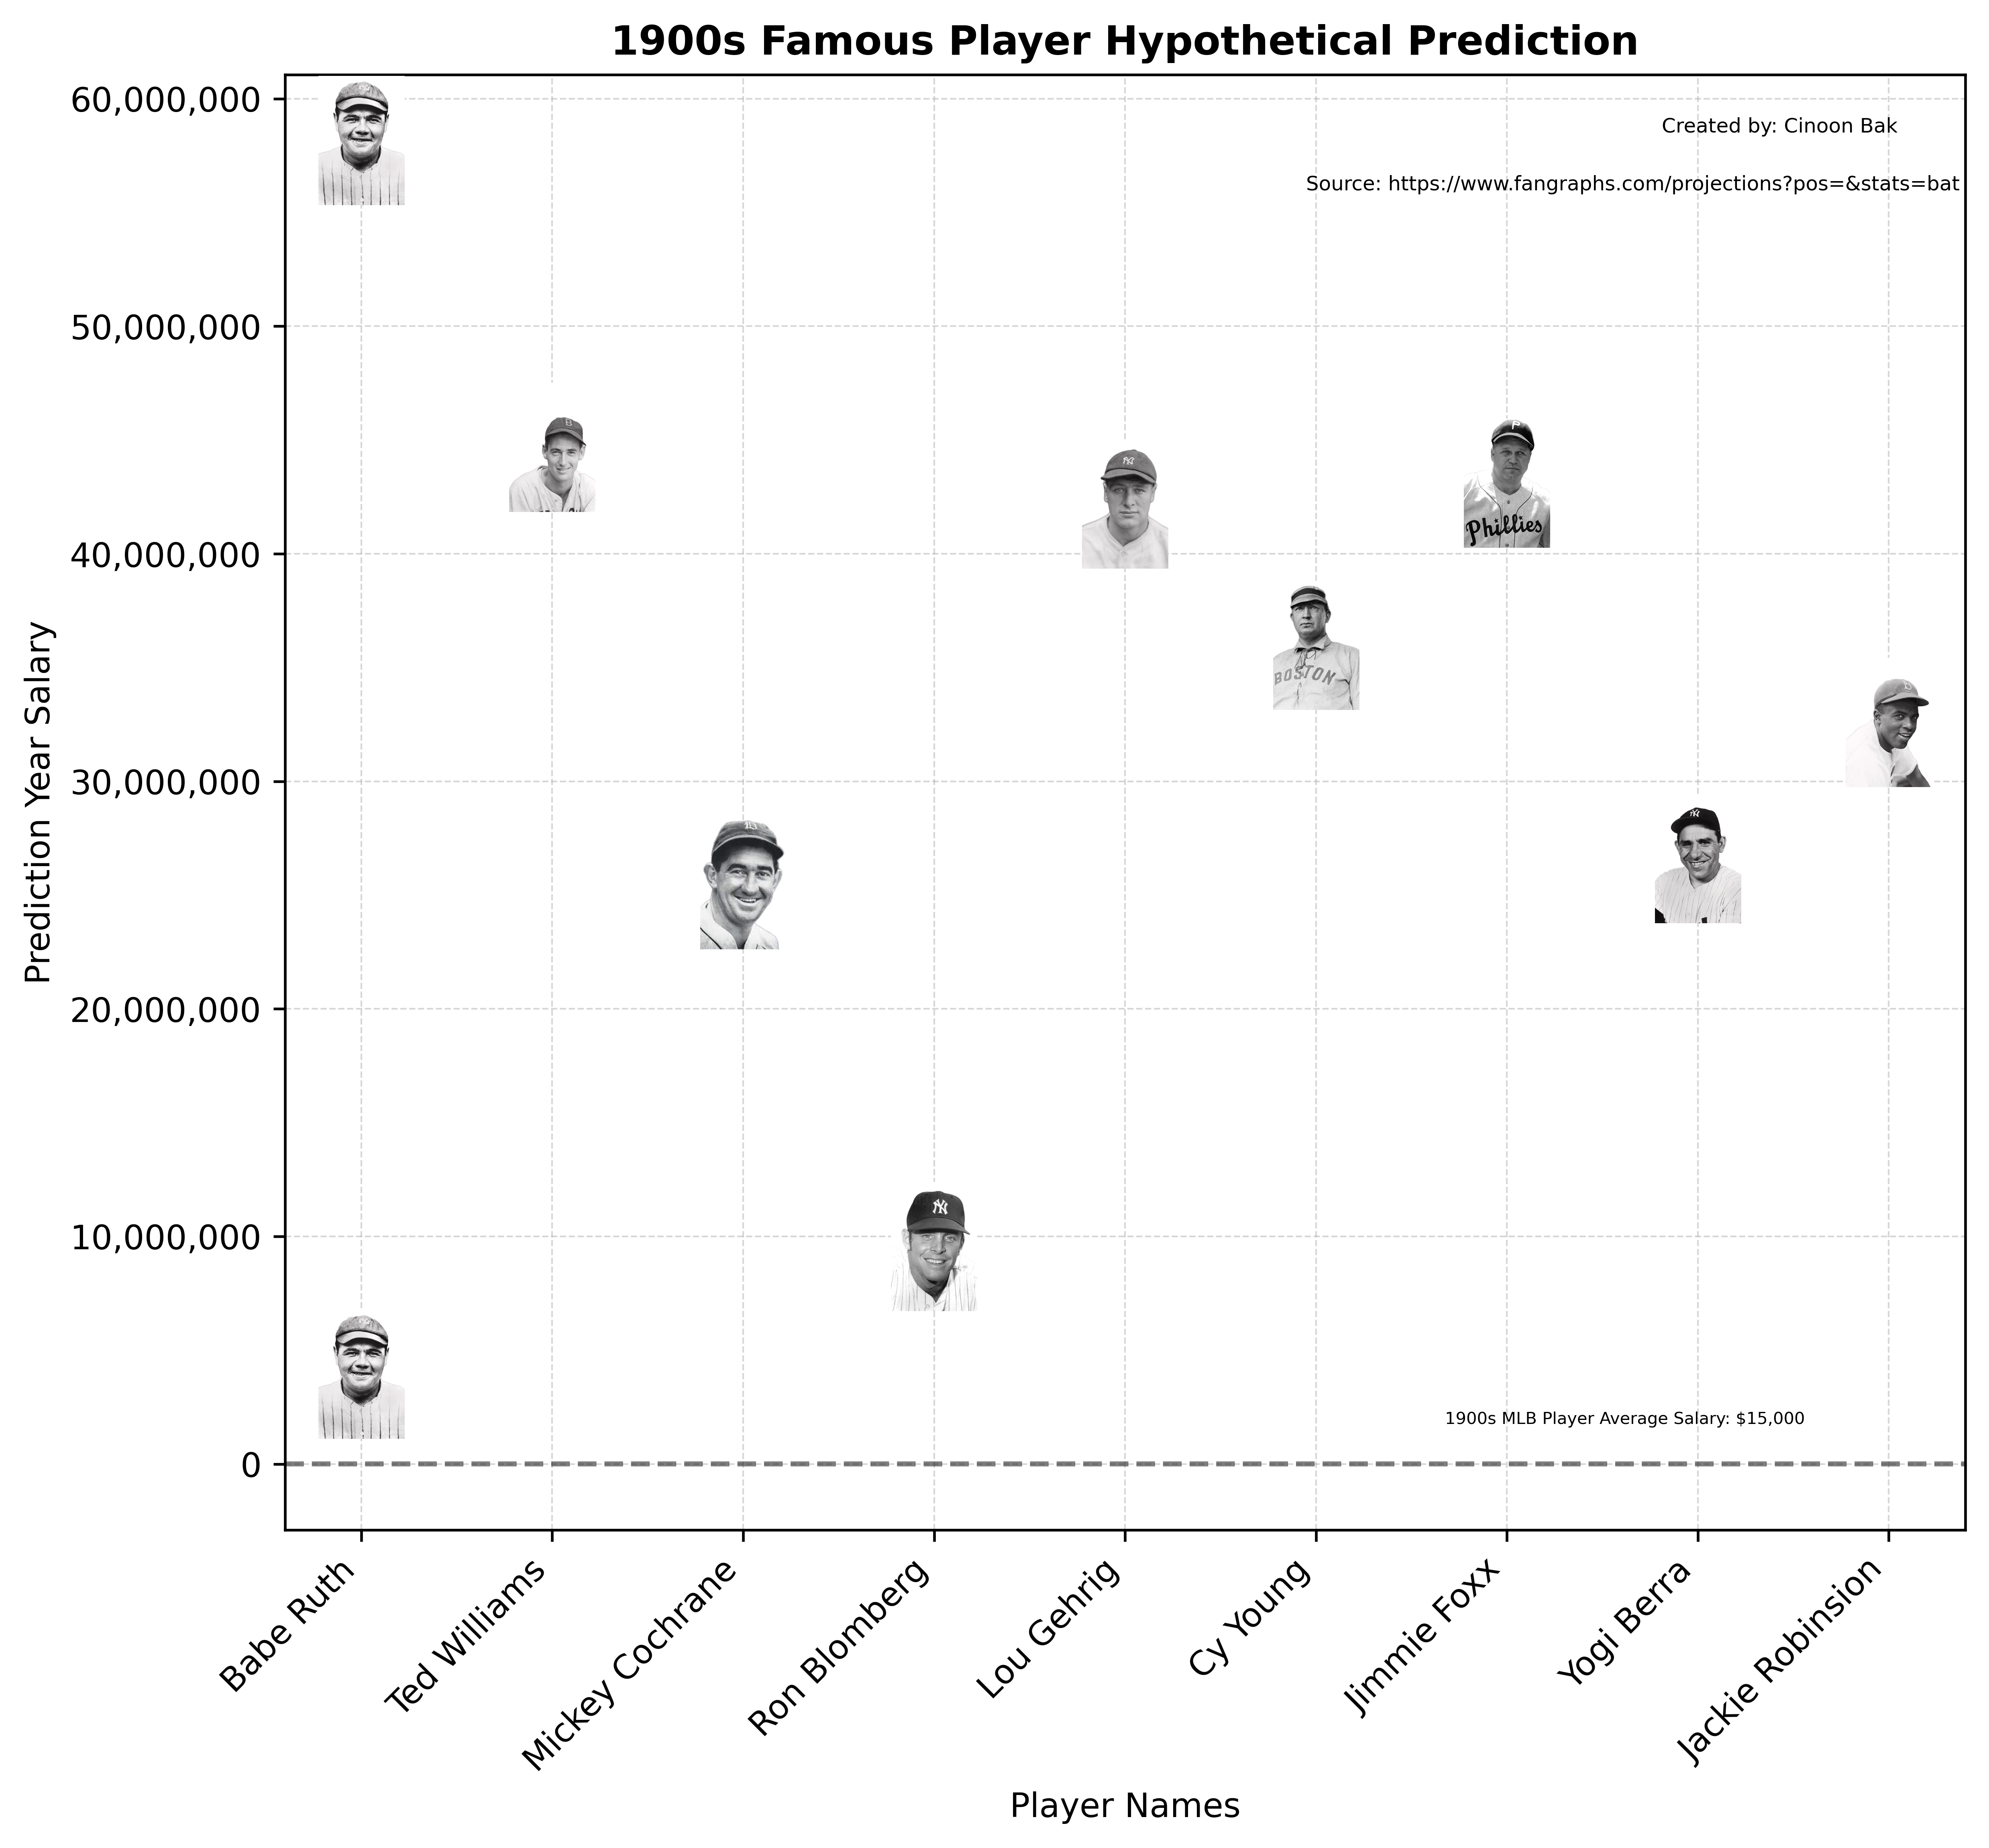

In [129]:
#plot
fig, ax = plt.subplots(figsize=(9,8), dpi=600)
plt.scatter(OldNames,y_pred_train2)
ax.set_title('1900s Famous Player Hypothetical Prediction', size=12, fontweight='bold')
plt.xlabel('Player Names')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Prediction Year Salary')
ax.grid(linestyle='--', linewidth=0.5, alpha=0.5)
#average fa salary
plt.axhline(y=15000, color = 'black', linestyle='dashed', alpha=.5)
fig.text(.66,.18, '1900s MLB Player Average Salary: $15,000', size=5)
#source and name
fig.text(.596,.82, 'Source: https://www.fangraphs.com/projections?pos=&stats=bat', size=6)
fig.text(.76,.85, 'Created by: Cinoon Bak',size=6)
#change value for y axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
#add images in
for x0, y0, path in zip(OldNames, y_pred_train2, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.savefig('Old_Prediction.png', bbox_inches='tight', )

plt.show()